<a href="https://colab.research.google.com/github/rajenbala/dlaicourse/blob/master/DNN_Classification_Exam_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [46]:
fashion_minst = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_minst.load_data()

In [47]:
X_train = X_train/255
X_test = X_test/255
X_train.shape

(60000, 28, 28)

In [48]:
y_test
set(y_test)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [49]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_names[y_test[9]]

'Sneaker'

In [50]:
firstModel = tf.keras.models.Sequential([
                                         tf.keras.layers.Flatten(input_shape=[28,28]),
                                         tf.keras.layers.Dense(300,activation="relu"),
                                         tf.keras.layers.Dense(100,activation="relu"),
                                         tf.keras.layers.Dense(10,activation="softmax")
])

In [51]:
firstModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


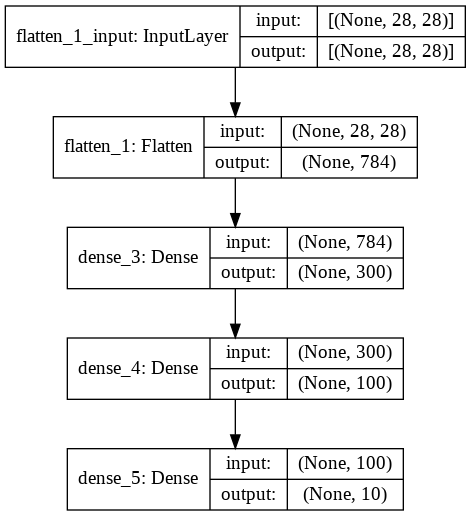

In [52]:
from tensorflow.keras.utils import plot_model
plot_model(model=firstModel,show_shapes=True)

In [53]:
#Checking initial weights and bias

#getting the layers
hidden_layers=firstModel.layers
hidden_layers

In [54]:
#getting a particular layer

hidden_layer_1 = firstModel.layers[1]
hidden_layer_1

In [55]:
#Getting initial weights

weights1,biases1 = hidden_layer_1.get_weights()
weights1,biases1


(array([[ 0.02631668, -0.03289274,  0.04061181, ...,  0.00646128,
         -0.02254102, -0.01119977],
        [-0.07377794, -0.01567322, -0.00774591, ..., -0.00403733,
         -0.07030234, -0.04259096],
        [-0.00112944, -0.06974302, -0.01828267, ..., -0.04289088,
         -0.04266445,  0.05938141],
        ...,
        [ 0.03962949, -0.01673756,  0.02178609, ..., -0.02936682,
         -0.03588974,  0.03244493],
        [ 0.07286641,  0.04475661, -0.03669247, ..., -0.06270614,
         -0.03672601, -0.05262734],
        [-0.01641525,  0.06368397, -0.01493595, ..., -0.0410893 ,
         -0.04994595, -0.04384748]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [56]:
biases1.shape #One bias for each node . Total node -300

(300,)

In [57]:
weights.shape #Each layer 784 input,each input one weight so total of 784 weights for one node. Total no.of nodes -300 .. SO 784*300

(784, 300)

In [58]:
X_Dev=X_train[:50000]
X_Val=X_train[50000:]
y_Dev=y_train[:50000]
y_Val=y_train[50000:]

In [59]:
## Compilation of model

firstModel.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer=tf.keras.optimizers.SGD(),metrics=["accuracy"])

firstModel.fit(X_Dev,y_Dev,epochs=30,validation_data=(X_Val,y_Val))

Epoch 1/30
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0172 - accuracy: 0.6779 - val_loss: 0.5335 - val_accuracy: 0.8154
Epoch 2/30
1563/1563 [==============================] - 5s 4ms/step - loss: 0.5109 - accuracy: 0.8232 - val_loss: 0.4800 - val_accuracy: 0.8279
Epoch 3/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4603 - accuracy: 0.8413 - val_loss: 0.4604 - val_accuracy: 0.8378
Epoch 4/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4333 - accuracy: 0.8493 - val_loss: 0.4917 - val_accuracy: 0.8197
Epoch 5/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4054 - accuracy: 0.8585 - val_loss: 0.4082 - val_accuracy: 0.8537
Epoch 6/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3874 - accuracy: 0.8646 - val_loss: 0.4619 - val_accuracy: 0.8305
Epoch 7/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3747 - accuracy: 0.8686 - val_loss: 0.3914 - val_accuracy:

In [60]:
history=firstModel.history
history.params

{'epochs': 30, 'steps': 1563, 'verbose': 1}

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

historyDataFrame=pd.DataFrame(history.history)



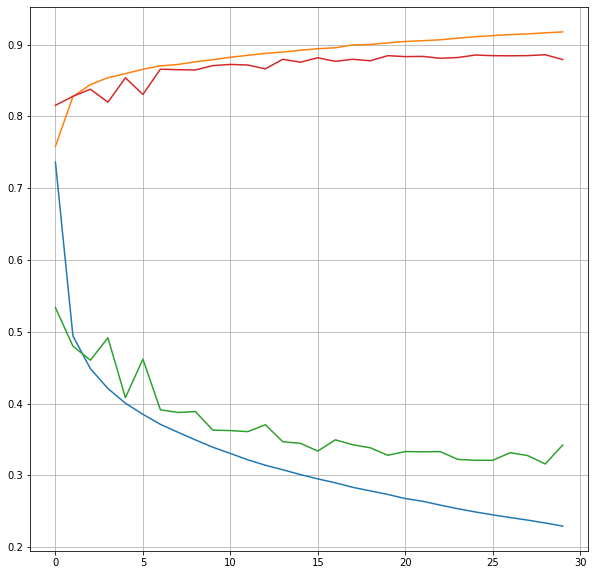

In [64]:
plt.figure(figsize=(10,10))
plt.plot(historyDataFrame)
plt.grid(True)
plt.show()

In [65]:
firstModel.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3692 - accuracy: 0.8689


[0.3691815435886383, 0.8689000010490417]

In [69]:
X_new=X_test[:3]
X_new.shape
y_pred=firstModel.predict(X_new)
y_pred.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [70]:
y_act=y_test[:3]
y_act

array([9, 2, 1], dtype=uint8)